In [1]:
import os
os.chdir("../")

In [4]:
import pickle as pkl


import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_dir = "/work/gildemeister/SCVIC-CIDS-2021"

## Analyse Normal Tensor

In [7]:
with open(os.path.join(data_dir, "CidsSampleNormal_Tensor_28.pkl"), 'rb') as f:
    data = pkl.load(f)
    

In [15]:
print(type(data))
print(len(data))
print(type(data[0]))
print(len(data[0]))
for i in range(len(data[0])):
    print(type(data[0][i]))
    if isinstance(data[0][i], torch.Tensor):
        print(data[0][i].shape)
    if isinstance(data[0][i], str):
        print(data[0][i])

<class 'list'>
460547
<class 'tuple'>
4
<class 'torch.Tensor'>
torch.Size([132])
<class 'torch.Tensor'>
torch.Size([28, 8])
<class 'str'>
The Amazon SSM Agent service terminated unexpectedly.  It has done this 208 time(s).  The following corrective action will be taken in 30000 milliseconds: Restart the service. The Amazon SSM Agent service terminated with the following service-specific error: 
Incorrect function. The Amazon SSM Agent service entered the stopped state.
<class 'str'>
Benign


The Normal data seems to contain the following:
- first list of all quadruples
- one quadruple contains networkflow-event, corresponding event features, event message and label
- the size of flow-events is 132 and features is [28, 8], for event features n correspondes to number of events and m number of features

## Analyse embeddings

In [16]:
with open(os.path.join(data_dir, "Msg2Vec_Bert_100.pkl"), 'rb') as f:
    data_embeddings = pkl.load(f)

In [64]:
idxs = []
for d in data:
    index = data_embeddings[0].index(d[2])
    idxs.append(index)


In [67]:
print(len(idxs))
print(idxs[:10])
print(idxs[:10] +[10])

460547
[12347, 4037, 4037, 4556, 713, 12320, 4839, 5461, 2088, 2917]
[12347, 4037, 4037, 4556, 713, 12320, 4839, 5461, 2088, 2917, 10]


In [68]:
print(type(data_embeddings))
print(len(data_embeddings))
print(type(data_embeddings[0]))
print(len(data_embeddings[0]))
for i in range(1, 5):
    print(i)
    print(data_embeddings[0][i])
print(type(data_embeddings[1]))
print(data_embeddings[1].shape)

<class 'tuple'>
2
<class 'list'>
13077
1
A service was installed in the system.

Service Name:  MpKsl3145a651
Service File Name:  C:\ProgramData\Microsoft\Windows Defender\Definition Updates\{2CC7546B-4D0D-4EC6-8261-F62AF62D7C37}\MpKsl3145a651.sys
Service Type:  kernel mode driver
Service Start Type:  system start
Service Account:   Installation Successful: Windows successfully installed the following update: Definition Update for Windows Defender Antivirus - KB2267602 (Definition 1.263.14.0) The WdiSystemHost service entered the running state. Installation Started: Windows has started installing the following update: Definition Update for Windows Defender Antivirus - KB2267602 (Definition 1.263.14.0) The Device Setup Manager service entered the stopped state. The TrustedInstaller service entered the running state. A service was installed in the system.

Service Name:  MpKsl011c4429
Service File Name:  C:\ProgramData\Microsoft\Windows Defender\Definition Updates\{82BB466D-DC6D-4BDB-A1E

In [32]:
embeddings = data_embeddings[1]
print(embeddings.shape)
print(torch.count_nonzero(embeddings) / embeddings.shape[0])

torch.Size([13077, 100, 768])
tensor(76800.)


## Analyse Attack

In [37]:
with open(os.path.join(data_dir, "CidsSampleAttack_Tensor_28.pkl"), 'rb') as f:
    data_attack = pkl.load(f)

In [38]:
print(type(data_attack))
print(len(data_attack))
print(type(data_attack[0]))
print(len(data_attack[0]))
for i in range(len(data_attack[0])):
    print(type(data_attack[0][i]))
    if isinstance(data_attack[0][i], torch.Tensor):
        print(data_attack[0][i].shape)
    if isinstance(data_attack[0][i], str):
        print(data_attack[0][i])

<class 'list'>
460547
<class 'tuple'>
4
<class 'torch.Tensor'>
torch.Size([132])
<class 'torch.Tensor'>
torch.Size([28, 8])
<class 'str'>
The Amazon SSM Agent service terminated unexpectedly.  It has done this 40 time(s).  The following corrective action will be taken in 30000 milliseconds: Restart the service. The Amazon SSM Agent service terminated with the following service-specific error: 
Incorrect function. The Amazon SSM Agent service entered the stopped state.
<class 'str'>
Bot


dict_keys(['Benign', 'Bot', 'DoS-SlowHTTPTest', 'DoS-Hulk', 'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Infiltration', 'DoS-GoldenEye', 'DoS-Slowloris', 'DDOS-LOIC-HTTP', 'DDOS-LOIC-UDP', 'FTP-BruteForce', 'SSH-Bruteforce', 'DDOS-HOIC'])


/tmp/ipykernel_2906514/194705150.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(occurences.keys(), rotation=90)
/tmp/ipykernel_2906514/194705150.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(occurences.keys(), rotation=90)


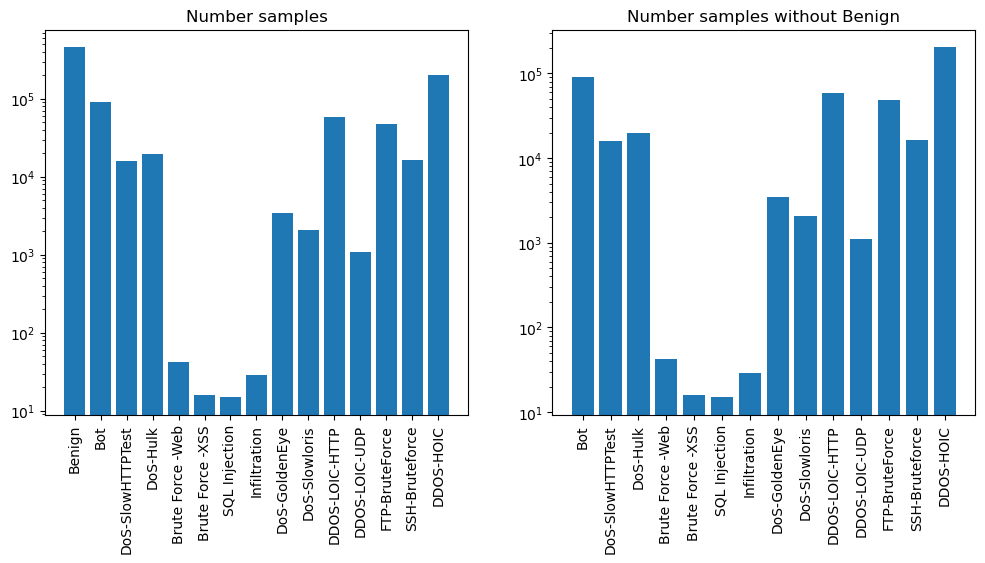

In [69]:
occurences = {}
for d in data:
    label = d[3]
    if label not in occurences:
        occurences[label] = 0
    occurences[label] += 1
for d in data_attack:
    label = d[3]
    if label not in occurences:
        occurences[label] = 0
    occurences[label] += 1
print(occurences.keys())
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(occurences.keys(), occurences.values())
axs[0].set_yscale('log')
axs[0].set_xticklabels(occurences.keys(), rotation=90)
axs[0].set_title("Number samples")
occurences.pop("Benign")
axs[1].bar(occurences.keys(), occurences.values())
axs[1].set_yscale('log')
axs[1].set_xticklabels(occurences.keys(), rotation=90)
axs[1].set_title("Number samples without Benign")

plt.show()
plt.close(fig)


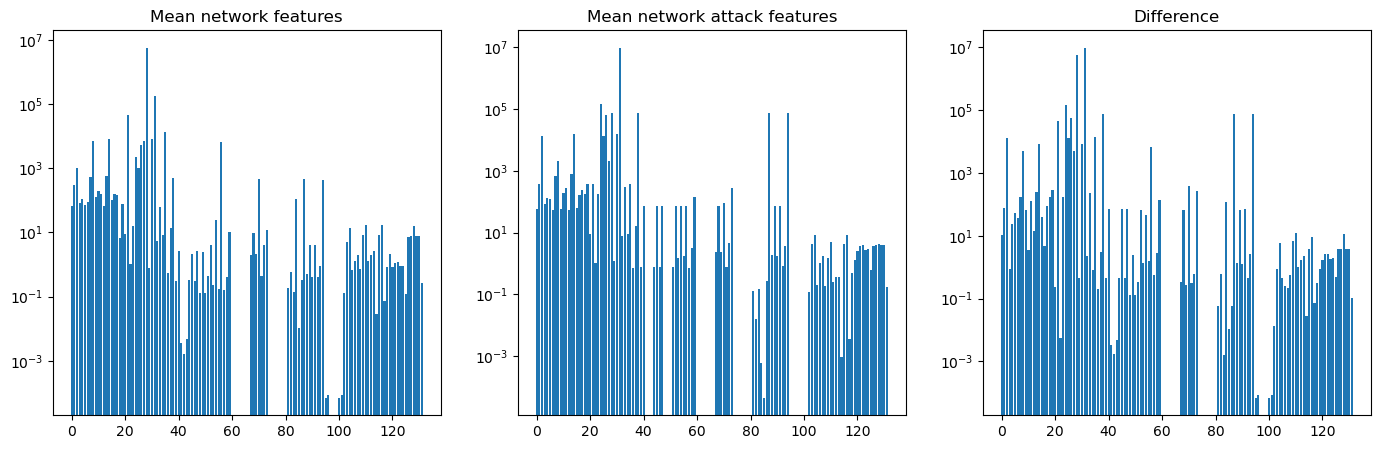

In [62]:
network_features_mean = torch.zeros_like(data[0][0])
for d in data:
    network_features_mean += d[0]
network_features_mean /= len(data)
network_attack_features_mean = torch.zeros_like(data_attack[0][0])
for d in data_attack:
    network_attack_features_mean += d[0]
network_attack_features_mean /= len(data_attack)

fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].bar(range(len(network_features_mean)), network_features_mean)
axs[0].set_title("Mean network features")
axs[0].set_yscale('log')

axs[1].bar(range(len(network_attack_features_mean)), network_attack_features_mean)
axs[1].set_title("Mean network attack features")
axs[1].set_yscale('log')

axs[2].bar(range(len(network_features_mean)), torch.abs(network_features_mean - network_attack_features_mean))
axs[2].set_title("Difference")
axs[2].set_yscale('log')

plt.show()
plt.close(fig)

In [63]:
for i in range(len(data[0][0])):
    print(data[0][0][i], data_attack[0][0][i], torch.abs(data[0][0][i] - data_attack[0][0][i]))

tensor(89.) tensor(54.) tensor(35.)
tensor(89.) tensor(380.) tensor(291.)
tensor(178.) tensor(608.) tensor(430.)
tensor(89.) tensor(54.) tensor(35.)
tensor(89.) tensor(121.6000) tensor(32.6000)
tensor(0.) tensor(144.5434) tensor(144.5434)
tensor(105.) tensor(54.) tensor(51.)
tensor(105.) tensor(166.) tensor(61.)
tensor(210.) tensor(411.) tensor(201.)
tensor(105.) tensor(66.) tensor(39.)
tensor(105.) tensor(82.2000) tensor(22.8000)
tensor(0.) tensor(47.4363) tensor(47.4363)
tensor(89.) tensor(54.) tensor(35.)
tensor(105.) tensor(380.) tensor(275.)
tensor(388.) tensor(1019.) tensor(631.)
tensor(97.) tensor(60.) tensor(37.)
tensor(97.) tensor(101.9000) tensor(4.9000)
tensor(9.2376) tensor(103.5229) tensor(94.2853)
tensor(2.) tensor(5.) tensor(3.)
tensor(74.0356) tensor(299.8159) tensor(225.7802)
tensor(2.) tensor(5.) tensor(3.)
tensor(74.3526) tensor(304.6371) tensor(230.2845)
tensor(1.) tensor(1.) tensor(0.)
tensor(4.) tensor(10.) tensor(6.)
tensor(146.3917) tensor(588.9636) tensor(442.5

In [ ]:
from torch.utils.data import DataLoader
from cids.data import SCVICCIDSDataset

